# How are UK house prices changing

The following notebook contains all the exploratory analysis for the *How are UK House Prices changing* blog on Medium.com (inlcude link)


source: https://www.gov.uk/guidance/about-the-price-paid-data#explanations-of-column-headers-in-the-ppd


Notes:
the data covers only England and Wales

Must add the OGL licence text before publishing

## 2. Import Data \& Basic Cleanup


### 2.1. Import Data

In [37]:
# Notebook-wide imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np

In [2]:
#data = pd.read_csv('data/pp-complete.csv', nrows=2000)
data = pd.read_csv('data/pp-complete.csv')

data.columns = ['tui',
                'price',
                'date_of_transfer',
                'postcode',
                'prop_type',
                'old_new',
                'duration',
                'paon',
                'saon',
                'street',
                'locality',
                'town_city',
                'district',
                'county',
                'ppd_category',
                'record_status'
]

In [3]:
data.tail()

,tui,price,date_of_transfer,postcode,prop_type,old_new,duration,paon,saon,street,locality,town_city,district,county,ppd_category,record_status
24501650,{85866A64-CBFC-143F-E053-6B04A8C06A15},187000,2019-02-22 00:00,SO16 9NP,T,N,F,3,NaN,WINDBURY ROAD,MILLBROOK,SOUTHAMPTON,SOUTHAMPTON,SOUTHAMPTON,A,A
24501651,{85866A64-CBFD-143F-E053-6B04A8C06A15},650000,2019-02-01 00:00,SO31 6PN,D,N,F,4,NaN,STILLMEADOWS,LOCKS HEATH,SOUTHAMPTON,FAREHAM,HAMPSHIRE,A,A
24501652,{85866A64-CBFF-143F-E053-6B04A8C06A15},175000,2019-02-22 00:00,SO16 3GB,F,N,L,1,NaN,GLEN EYRE CLOSE,NaN,SOUTHAMPTON,SOUTHAMPTON,SOUTHAMPTON,A,A
24501653,{85866A64-CC00-143F-E053-6B04A8C06A15},327000,2019-03-01 00:00,SO43 7AL,S,N,F,7,NaN,CLARENCE ROAD,NaN,LYNDHURST,NEW FOREST,HAMPSHIRE,A,A
24501654,{85866A64-CC01-143F-E053-6B04A8C06A15},287500,2019-03-14 00:00,GU51 1GQ,T,N,F,6,NaN,THEGN WALK,NaN,FLEET,HART,HAMPSHIRE,A,A


### 2.2. Data Dictionary

* **tui**: A reference number which is generated automatically recording each published sale. The number is unique and will change each time a sale is recorded.
* **price**: Sale price stated on the transfer deed.
* **date_of_transfer**: Date when the sale was completed, as stated on the transfer deed.
* **postcode**: This is the postcode used at the time of the original transaction. Note that postcodes can be reallocated and these changes are not reflected in the Price Paid Dataset.
* **prop_type**: D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes, O = Other. Note that:
    - we only record the above categories to describe property type, we do not separately identify bungalows.
    - end-of-terrace properties are included in the Terraced category above.
    - ‘Other’ is only valid where the transaction relates to a property type that is not covered by existing values.
* **old_new**: Indicates the age of the property and applies to all price paid transactions, residential and non-residential. Y = a newly built property, N = an established residential building
* **duration**: Relates to the tenure: F = Freehold, L= Leasehold etc.Note that HM Land Registry does not record leases of 7 years or less in the Price Paid Dataset.
* **paon**: Primary Addressable Object Name. Typically the house number or name.
* **saon**: Secondary Addressable Object Name. Where a property has been divided into separate units (for example, flats), the PAON (above) will identify the building and a SAON will be specified that identifies the separate unit/flat.
* **street**
* **locality**
* **town_city**
* **district**
* **county**
* **ppd_category**: Indicates the type of Price Paid transaction.
    A = Standard Price Paid entry, includes single residential property sold for full market value.
    B = Additional Price Paid entry including transfers under a power of sale/repossessions, buy-to-lets (where they can be identified by a Mortgage) and transfers to non-private individuals.

    Note that category B does not separately identify the transaction types stated.HM Land Registry has been collecting information on Category A transactions from January 1995. Category B transactions were identified from October 2013.
* **record_status**: Indicates additions, changes and deletions to the records.(see guide below).
    A = Addition
    C = Change
    D = Delete.

    Note that where a transaction changes category type due to misallocation (as above) it will be deleted from the original category type and added to the correct category with a new transaction unique identifier.

### 2.3. Data Preparation

The imported data is from a .csv flatfile and so we would need to sort out some of the data types, just so that the exploration is a little easier.

#### 2.3.1. Convert *date_of_transfer* from string to datetime format


In [4]:
data.date_of_transfer[0]

'1995-10-09 00:00'

In [5]:
data.date_of_transfer = pd.to_datetime(data.date_of_transfer, dayfirst=True)

In [6]:
data.head()

,tui,price,date_of_transfer,postcode,prop_type,old_new,duration,paon,saon,street,locality,town_city,district,county,ppd_category,record_status
0,{1BA349E3-2579-40D6-999E-49E2A25D2284},73450,1995-10-09,L26 7XJ,D,Y,F,6,NaN,CATKIN ROAD,LIVERPOOL,LIVERPOOL,KNOWSLEY,MERSEYSIDE,A,A
1,{E5B50DCB-BC7A-4E54-B167-49E2A6B4148B},59000,1995-03-31,BH12 2AE,D,N,F,28,NaN,ALDER ROAD,POOLE,POOLE,POOLE,POOLE,A,A
2,{81E50116-D675-4B7F-9F8D-49E2B5D43271},31000,1995-12-04,IP13 0DR,D,Y,F,NONSUCH COTTAGE,NaN,THE STREET,HACHESTON,WOODBRIDGE,SUFFOLK COASTAL,SUFFOLK,A,A
3,{B97455B9-75CB-40BB-A615-42C53683E143},95000,1995-09-22,WS14 0BE,D,N,F,FOX COVER COTTAGE,NaN,HALL LANE,LICHFIELD,LICHFIELD,LICHFIELD,STAFFORDSHIRE,A,A
4,{F0D1E8DA-C00D-467A-A41C-42C5378DB6E0},45450,1995-02-28,S42 5GA,S,Y,F,109,NaN,ELVASTON ROAD,NORTH WINGFIELD,CHESTERFIELD,NORTH EAST DERBYSHIRE,DERBYSHIRE,A,A


# 3. Data Exploration

## 3.1. How many number of sales have been recorded since 1995?

In [7]:
data.shape[0]

24501655

## 3.2. Top-level view

In [8]:
data_sample = data.sample(frac = .0001)

In [9]:
data_sample.shape[0]

2450

In Fig. 1, we can see that there seems to be steady creep towards higher and higher prices, yet it's difficult to make out what the density is and just how the prices change.

### 3.3. Sales over time

In [10]:
data_sample['month'] = data_sample['date_of_transfer'].dt.month
data_sample['year'] = data_sample['date_of_transfer'].dt.year

In [11]:
data_sample.head()

,tui,price,date_of_transfer,postcode,prop_type,old_new,duration,paon,saon,street,locality,town_city,district,county,ppd_category,record_status,month,year
19462247,{62B8F3A2-BEC4-4019-83A5-429980FE0FE9},159950,2014-02-03,DH4 5JB,S,Y,F,40,NaN,PRIMROSE LANE,NaN,HOUGHTON LE SPRING,SUNDERLAND,TYNE AND WEAR,A,A,2,2014
24315377,{87E1551E-03D4-6405-E053-6C04A8C0B2EE},77500,2019-03-01,LL11 2LR,F,N,L,21,NaN,LORNE STREET,NaN,WREXHAM,WREXHAM,WREXHAM,A,A,3,2019
10313589,{284D04CF-0551-49BC-8C03-94EAF87092DF},70000,2004-06-25,LS12 1LD,S,N,F,33,NaN,FIRST AVENUE,LEEDS,LEEDS,LEEDS,WEST YORKSHIRE,A,A,6,2004
23136368,{666758D6-F7D9-3363-E053-6B04A8C0D74E},263000,2018-01-29,PE10 9UB,D,N,F,6,NaN,BARKSTON CLOSE,NaN,BOURNE,SOUTH KESTEVEN,LINCOLNSHIRE,A,A,1,2018
4742177,{02F4EA5E-F13A-45D9-9552-F520F2BDA593},58000,1999-02-05,NN8 2BE,S,N,F,134,NaN,HENSHAW ROAD,NaN,WELLINGBOROUGH,WELLINGBOROUGH,NORTHAMPTONSHIRE,A,A,2,1999


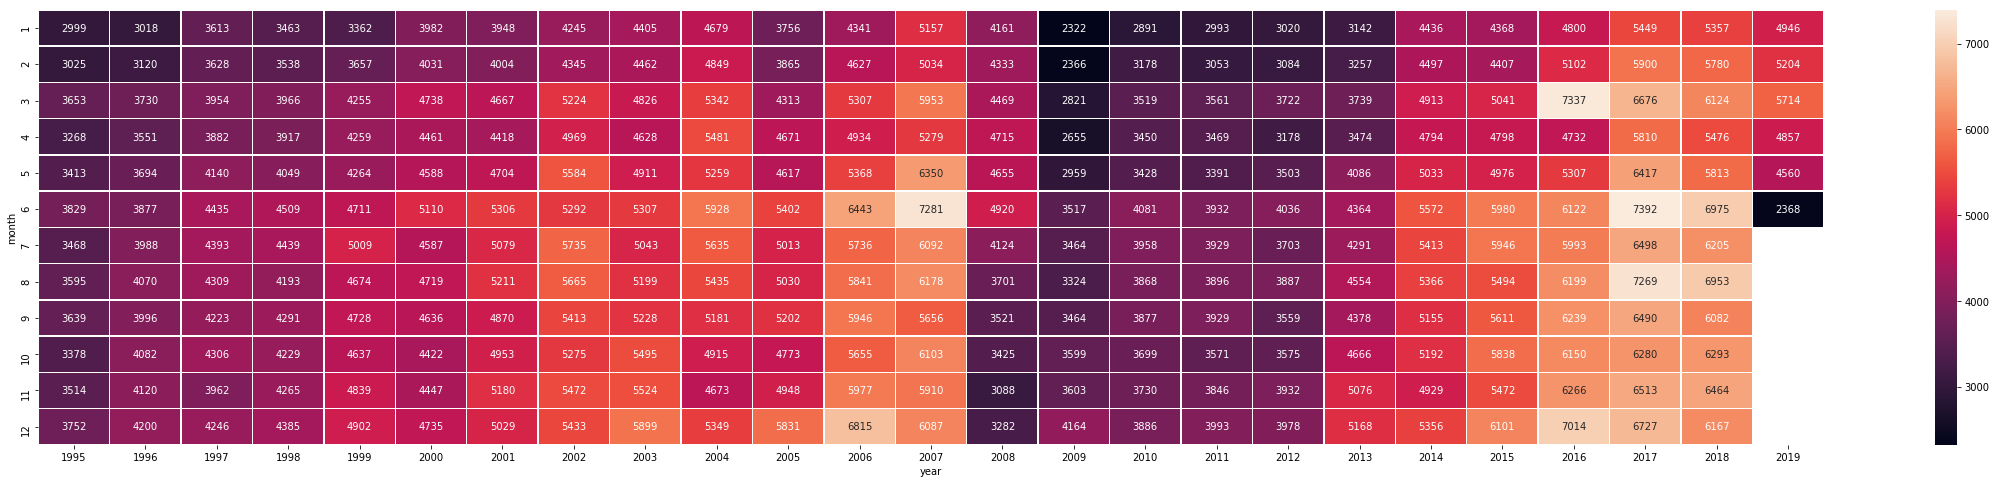

In [12]:
# Full sample
data['month'] = data['date_of_transfer'].dt.month
data['year'] = data['date_of_transfer'].dt.year

data_sample_pivot = data.pivot_table(values='price', index='month', columns='year', aggfunc=pd.Series.nunique)
plt.figure(figsize=(40,8))
sns.heatmap(data_sample_pivot, annot=True, linewidths=.5, fmt='g')
plt.show()

That's interesting - we can clearly see three different cycles:
* mid-2001 to mid-2008: high sales volumes
* mid-2008 to mid-2013: low(er) sales volumes
* mid-2013 to now: high sales volumes

An interesting observation is that 2017 and 2018 were recording some of the highest number of sales since the data collection began (in 1995).

What about the average price?


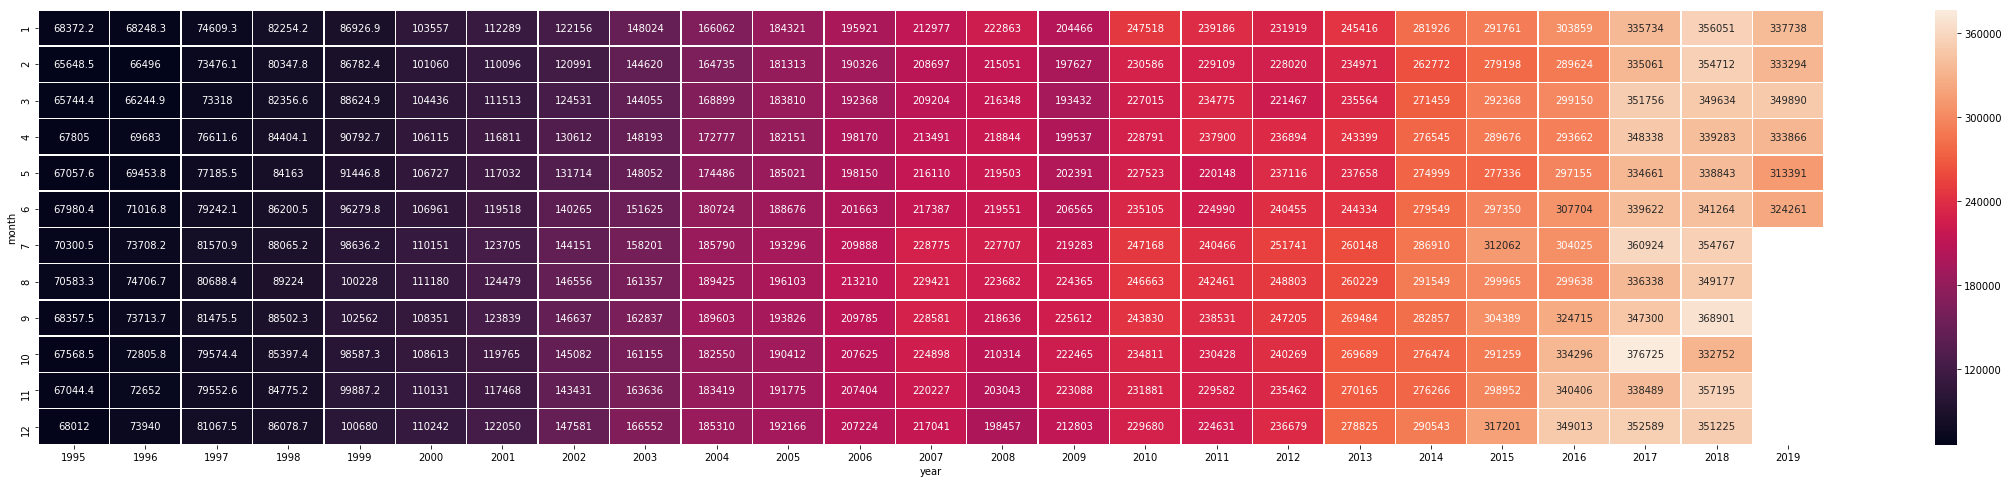

In [13]:
data_sample_pivot = data.pivot_table(values='price', index='month', columns='year')
plt.figure(figsize=(40,8))
sns.heatmap(data_sample_pivot, annot=True, linewidths=.5, fmt='g')
plt.show()

Unlike the sales volumes, the average property price has been going up consistently since 1995. 

Let's check the median values:

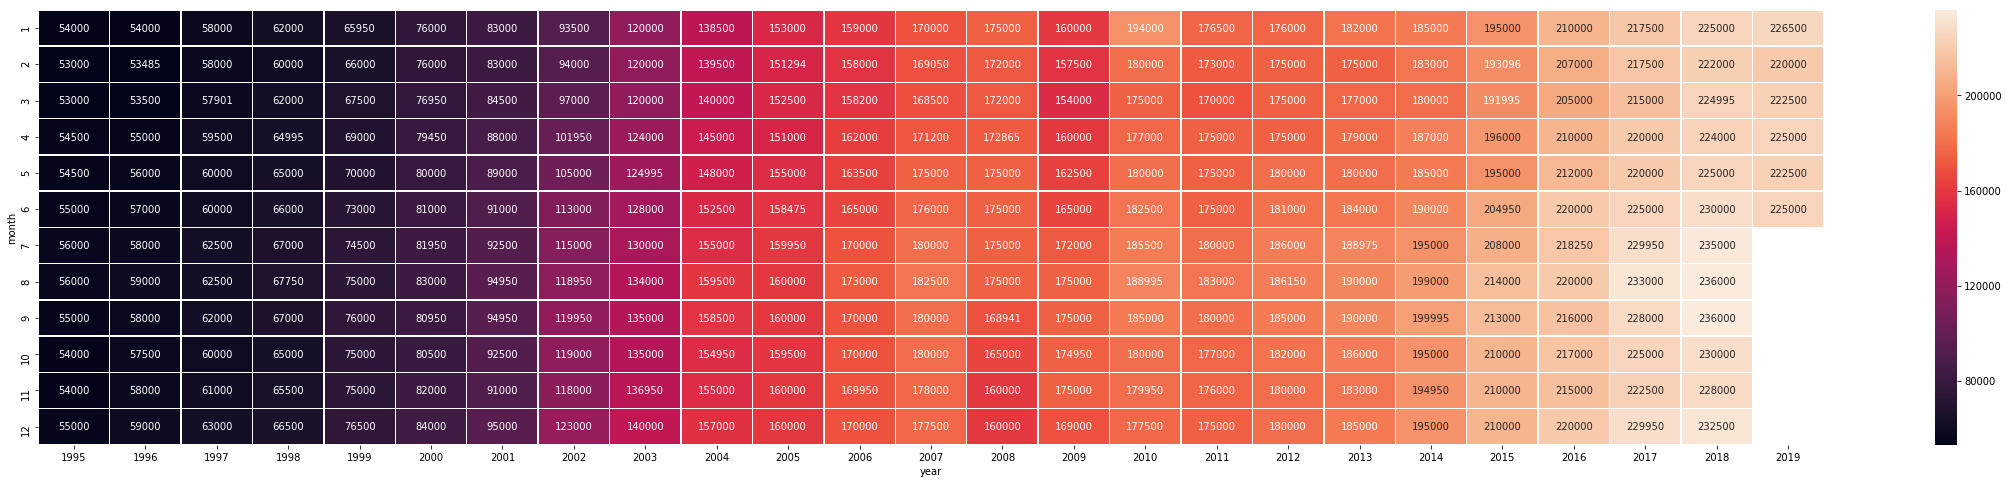

In [42]:
data_sample_pivot = data.pivot_table(values='price', index='month', columns='year', aggfunc=np.median)
plt.figure(figsize=(40,8))
sns.heatmap(data_sample_pivot, annot=True, linewidths=.5, fmt='g')
plt.show()

Median < mean, so the higher end of properties is quite 'heavy'.

## 3.4. Different Property Types

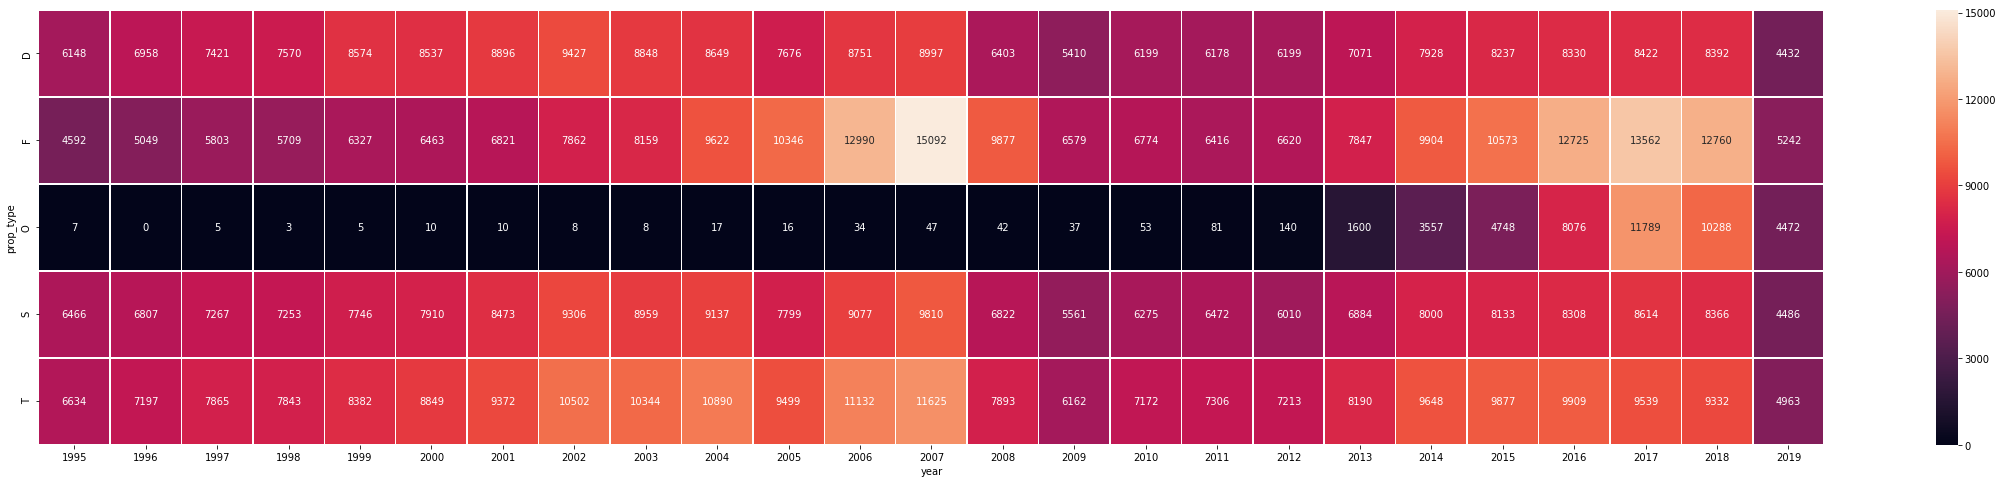

In [14]:
data_sample_pivot = data.pivot_table(values='price', index='prop_type', columns='year', fill_value = 0, aggfunc=pd.Series.nunique)

plt.figure(figsize=(40,8))
sns.heatmap(data_sample_pivot, annot=True, linewidths=.5, fmt='g')
plt.show()

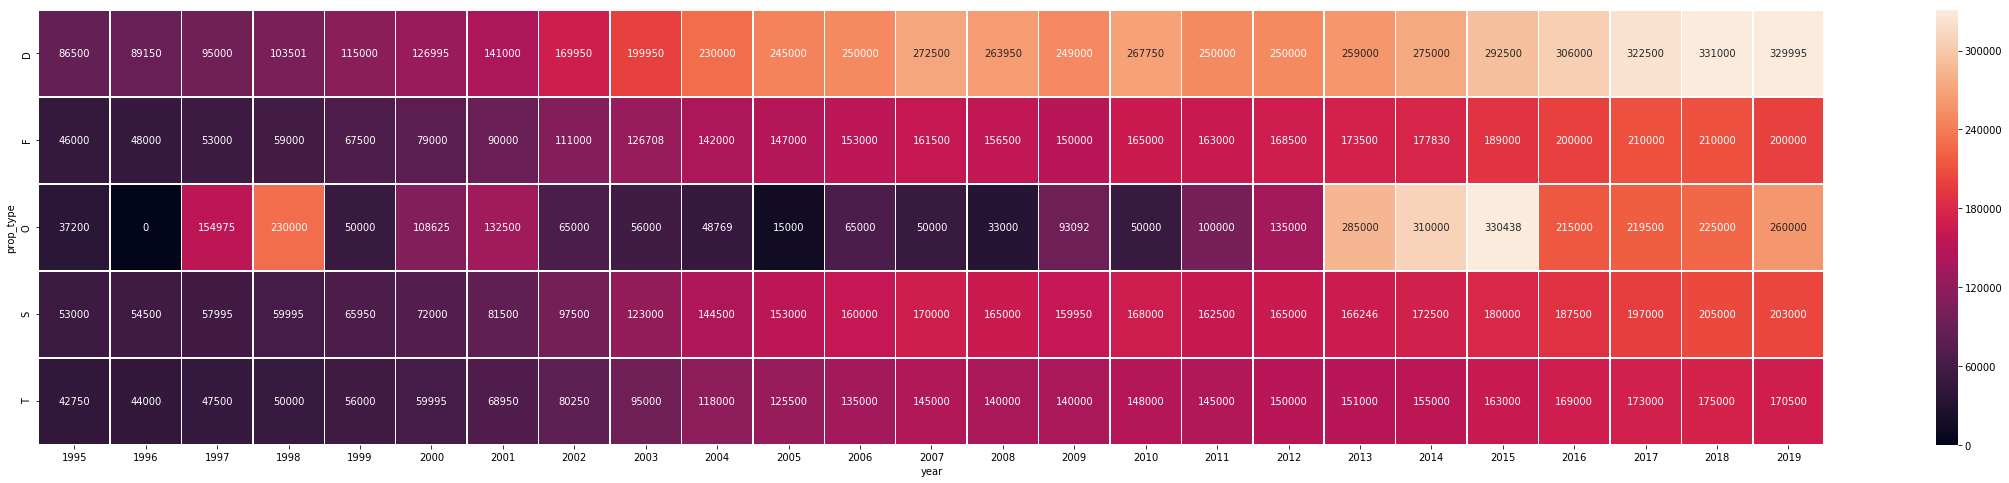

In [43]:
data_sample_pivot = data.pivot_table(values='price', index='prop_type', columns='year', fill_value = 0, aggfunc=np.median)

plt.figure(figsize=(40,8))
sns.heatmap(data_sample_pivot, annot=True, linewidths=.5, fmt='g')
plt.show()

exclude the "O" property types:

In [16]:
data_sample = data[(data.prop_type != "O") & (data.date_of_transfer < pd.to_datetime('01/01/2019', dayfirst=True))]

In [17]:
data_sample.prop_type.value_counts()

T    7345806
S    6640884
D    5556552
F    4381230
Name: prop_type, dtype: int64

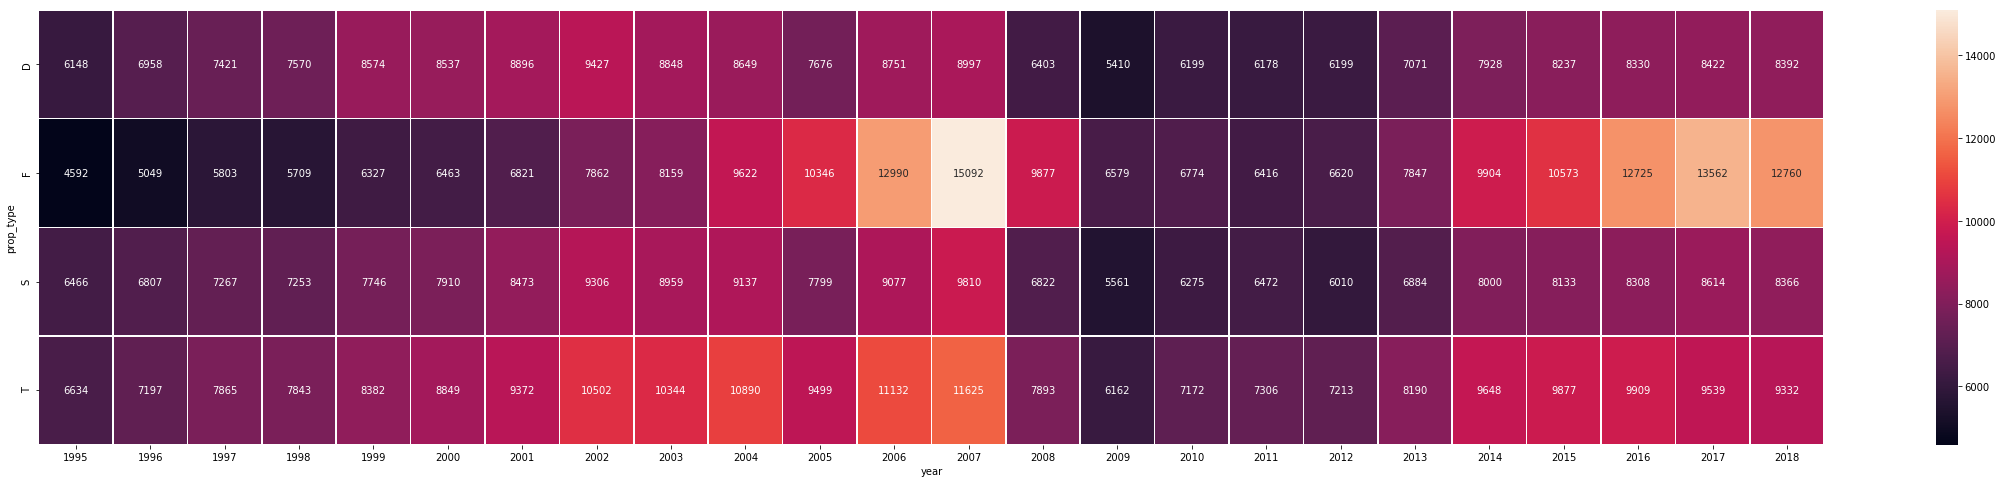

In [18]:
data_sample_pivot = data_sample.pivot_table(values='price', index='prop_type', columns='year', fill_value = 0, aggfunc=pd.Series.nunique)

plt.figure(figsize=(40,8))
sns.heatmap(data_sample_pivot, annot=True, linewidths=.5, fmt='g')
plt.show()

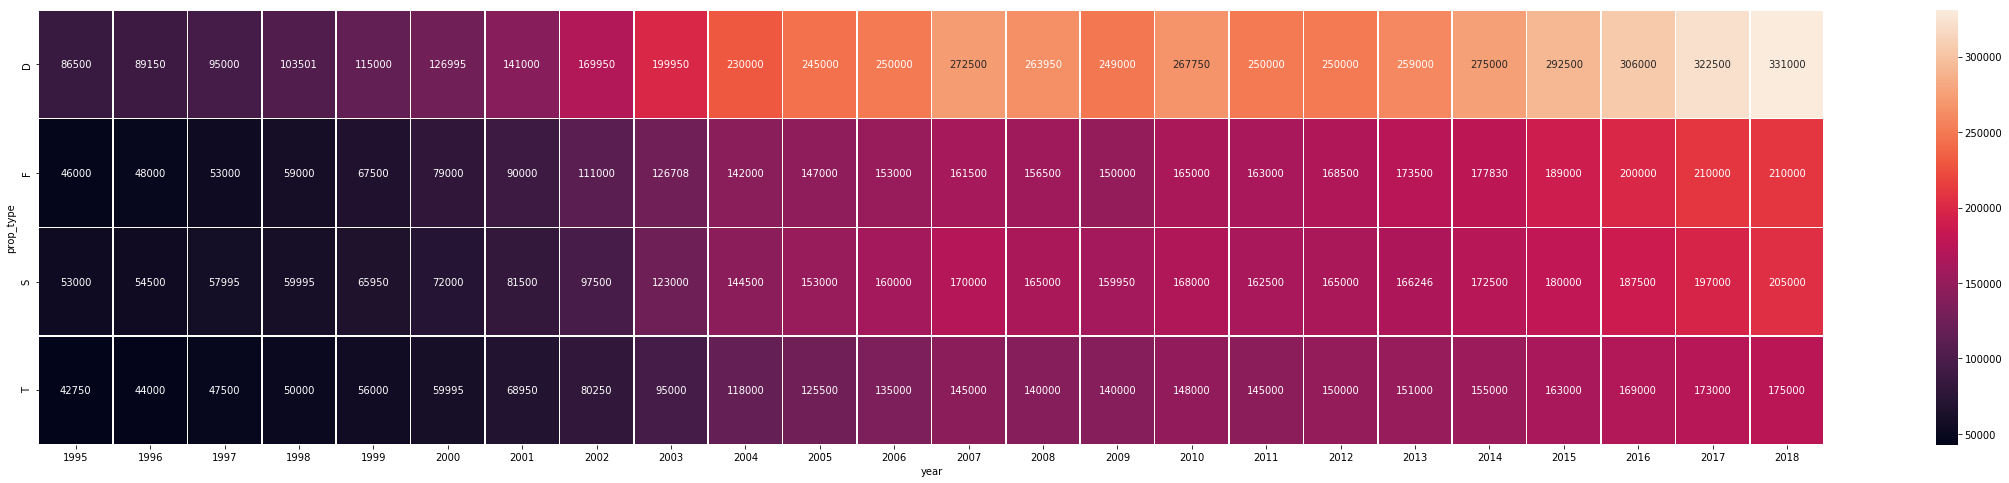

In [59]:
data_sample_pivot = data_sample.pivot_table(values='price', index='prop_type', columns='year', fill_value = 0, aggfunc=np.median)

plt.figure(figsize=(40,8))
sns.heatmap(data_sample_pivot, annot=True, linewidths=.5, fmt='g')
plt.show()

## 3.5. Chart comparison across different prop types

In [60]:
flats_data = pd.DataFrame(data_sample_pivot.loc['F'])
flats_data.columns = ['price']
flats_data = flats_data.reset_index()

semi_detached_data = pd.DataFrame(data_sample_pivot.loc['S'])
semi_detached_data.columns = ['price']
semi_detached_data = semi_detached_data.reset_index()

terraced_data = pd.DataFrame(data_sample_pivot.loc['T'])
terraced_data.columns = ['price']
terraced_data = terraced_data.reset_index()

detached_data = pd.DataFrame(data_sample_pivot.loc['D'])
detached_data.columns = ['price']
detached_data = detached_data.reset_index()

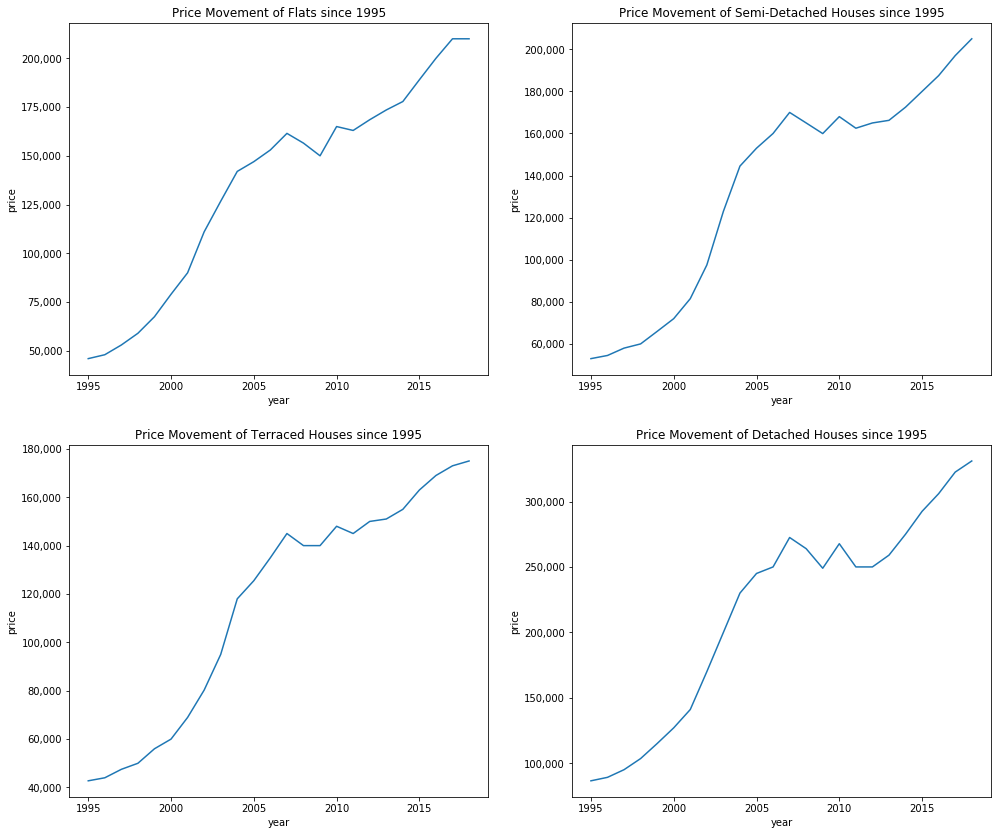

In [61]:
f, axes = plt.subplots(2,2,figsize=(16,10))
plt.subplots_adjust(left=0.1, bottom=None, right=None, top=1.2, wspace=None, hspace=None)
sns.lineplot(data=flats_data, x='year', y='price', ax = axes[0,0]).set_title('Price Movement of Flats since 1995')
sns.lineplot(data=semi_detached_data, x='year', y='price', ax = axes[0,1]).set_title('Price Movement of Semi-Detached Houses since 1995')
sns.lineplot(data=terraced_data, x='year', y='price', ax = axes[1,0]).set_title('Price Movement of Terraced Houses since 1995')
sns.lineplot(data=detached_data, x='year', y='price', ax = axes[1,1]).set_title('Price Movement of Detached Houses since 1995')

axes[0,0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axes[0,1].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axes[1,0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axes[1,1].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

## 3.6. Sales Volumes

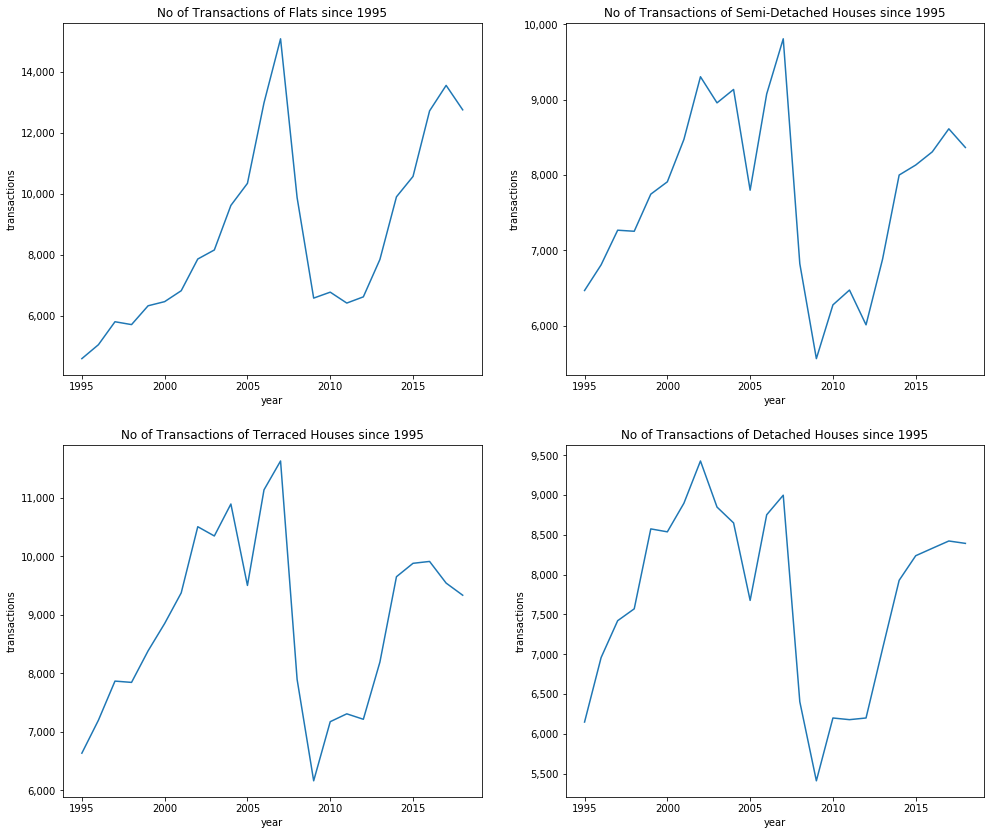

In [47]:
data_sample_pivot = data_sample.pivot_table(values='price', index='prop_type', columns='year', fill_value = 0, aggfunc=pd.Series.nunique)

flats_data = pd.DataFrame(data_sample_pivot.loc['F'])
flats_data.columns = ['transactions']
flats_data = flats_data.reset_index()

semi_detached_data = pd.DataFrame(data_sample_pivot.loc['S'])
semi_detached_data.columns = ['transactions']
semi_detached_data = semi_detached_data.reset_index()

terraced_data = pd.DataFrame(data_sample_pivot.loc['T'])
terraced_data.columns = ['transactions']
terraced_data = terraced_data.reset_index()

detached_data = pd.DataFrame(data_sample_pivot.loc['D'])
detached_data.columns = ['transactions']
detached_data = detached_data.reset_index()

f, axes = plt.subplots(2,2,figsize=(16,10))
plt.subplots_adjust(left=0.1, bottom=None, right=None, top=1.2, wspace=None, hspace=None)
sns.lineplot(data=flats_data, x='year', y='transactions', ax = axes[0,0]).set_title('No of Transactions of Flats since 1995')
sns.lineplot(data=semi_detached_data, x='year', y='transactions', ax = axes[0,1]).set_title('No of Transactions of Semi-Detached Houses since 1995')
sns.lineplot(data=terraced_data, x='year', y='transactions', ax = axes[1,0]).set_title('No of Transactions of Terraced Houses since 1995')
sns.lineplot(data=detached_data, x='year', y='transactions', ax = axes[1,1]).set_title('No of Transactions of Detached Houses since 1995')

axes[0,0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axes[0,1].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axes[1,0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axes[1,1].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

That's interesting - house prices keep going up, yet the number of transactions are still not where they were at pre-2008.

## 3.7. Metropolitan areas

In [23]:
city_cols = ['LONDON', 'BIRMINGHAM', 'MANCHESTER', 'LIVERPOOL', 'LEEDS']

met_data = data[(data['town_city'].isin(city_cols)) & (data.date_of_transfer < pd.to_datetime('01/01/2019')) ]

In [24]:
met_data.head()

,tui,price,date_of_transfer,postcode,prop_type,old_new,duration,paon,saon,street,locality,town_city,district,county,ppd_category,record_status,month,year
0,{1BA349E3-2579-40D6-999E-49E2A25D2284},73450,1995-10-09,L26 7XJ,D,Y,F,6,NaN,CATKIN ROAD,LIVERPOOL,LIVERPOOL,KNOWSLEY,MERSEYSIDE,A,A,10,1995
46,{7624595C-53BF-4AC8-9683-42C5F7CFA5C6},66500,1995-07-12,SE6 4EW,T,N,F,6,NaN,BROXTED ROAD,LONDON,LONDON,LEWISHAM,GREATER LONDON,A,A,7,1995
49,{246B8CEE-CFF7-41FB-828A-46539C51A84F},45000,1995-01-12,LS16 5NE,S,N,F,19,NaN,HOLLIN DRIVE,LEEDS,LEEDS,LEEDS,WEST YORKSHIRE,A,A,1,1995
51,{D9B1A44D-BD4F-4CD1-991F-3F32AB4C5FD2},38000,1995-07-05,B25 8SP,T,N,F,38,NaN,DEBENHAM ROAD,YARDLEY,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,A,A,7,1995
52,{A3B63010-F97E-4FDB-A4A6-3BA1770D5A3C},85000,1995-01-27,B43 7RG,D,N,F,7,NaN,COMSEY ROAD,BIRMINGHAM,BIRMINGHAM,WALSALL,WEST MIDLANDS,A,A,1,1995


In [62]:
met_trans_vol = met_data.pivot_table(values='price', index='town_city', columns='year', fill_value = 0, aggfunc=pd.Series.nunique)
met_sales_vol = met_data.pivot_table(values='price', index='town_city', columns='year', fill_value = 0, aggfunc=np.median).round(2)


In [63]:
met_trans_vol

year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
town_city,,,,,,,,,,,,,,,,,,,,,
BIRMINGHAM,1072,1237,1250,1315,1398,1451,1559,1708,1717,1815,...,1160,1214,1118,1027,1260,1474,1580,1963,2039,2076
LEEDS,1063,1157,1239,1232,1431,1424,1525,1764,1821,1971,...,1109,1183,1130,1145,1361,1553,1735,1808,1938,1832
LIVERPOOL,1209,1136,1145,1180,1243,1297,1345,1533,1838,1673,...,860,947,955,899,1149,1409,1460,1627,1920,1920
LONDON,3967,4410,5166,4923,5362,5055,4967,5275,4590,5274,...,3510,4578,4697,5269,6343,7675,7669,8924,9575,8638
MANCHESTER,1312,1418,1495,1497,1695,1788,1913,2301,2433,2581,...,1268,1418,1319,1213,1386,1745,1952,2148,2473,2246


In [64]:
met_sales_vol

year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
town_city,,,,,,,,,,,,,,,,,,,,,
BIRMINGHAM,44500,45000,47500,50000,53000,"57,950.00",65000,79150,100000,119950,...,123000,125000,124950,125000,125300,132000,140000,150000,160000,170000
LEEDS,48000,48500,51000,54000,58000,"63,000.00",69000,82000,104995,125000,...,135000,140000,137500,140000,140000,143500,148000,158000,163000,170000
LIVERPOOL,42000,45000,45000,46425,49950,"52,950.00",58500,63500,78500,100000,...,125000,120000,120000,121000,120000,120995,124055,124000,128000,129950
LONDON,75500,82000,93000,106995,130000,"154,887.50",170000,199000,214000,232500,...,300000,330000,335000,344000,375000,425000,460000,499999,515000,505900
MANCHESTER,41000,41200,43750,46000,47500,"50,000.00",56750,67950,82000,100000,...,120000,120000,123000,124500,124995,128000,135950,145000,157000,164950


In [65]:
def plot_metro_sales_vol(city):
    met_city_sales = pd.DataFrame(met_sales_vol.loc[city])
    met_city_sales.columns = ['price']
    met_city_sales = met_city_sales.reset_index()

    met_city_vol = pd.DataFrame(met_trans_vol.loc[city])
    met_city_vol.columns = ['transactions']
    met_city_vol = met_city_vol.reset_index()

    f, axes = plt.subplots(1,2,figsize=(16,5))
    plt.subplots_adjust(left=0.1, bottom=None, right=None, top=1.2, wspace=None, hspace=None)
    sns.lineplot(data=met_city_sales, x='year', y='price', ax = axes[0]).set_title('Average Sales Price in {}'.format(city))
    sns.lineplot(data=met_city_vol, x='year', y='transactions', ax = axes[1]).set_title('Number of Transactions in {}'.format(city))

    axes[0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    axes[1].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    plt.show()

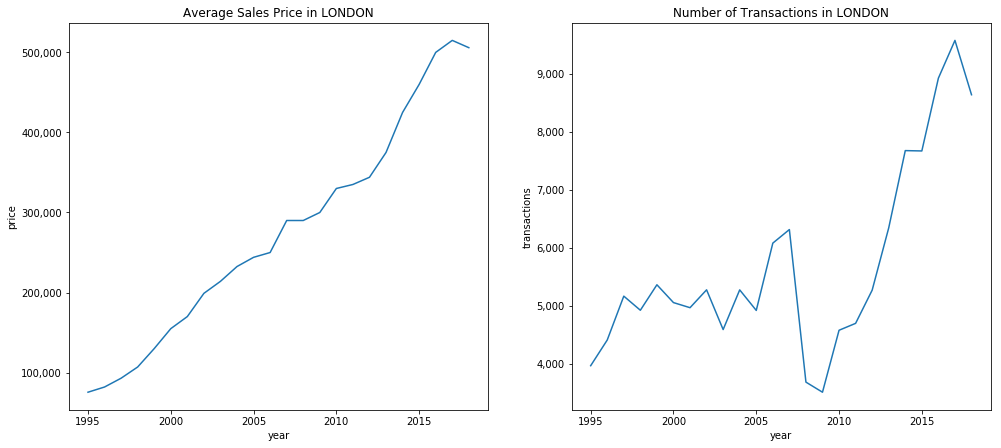

In [66]:
plot_metro_sales_vol("LONDON")

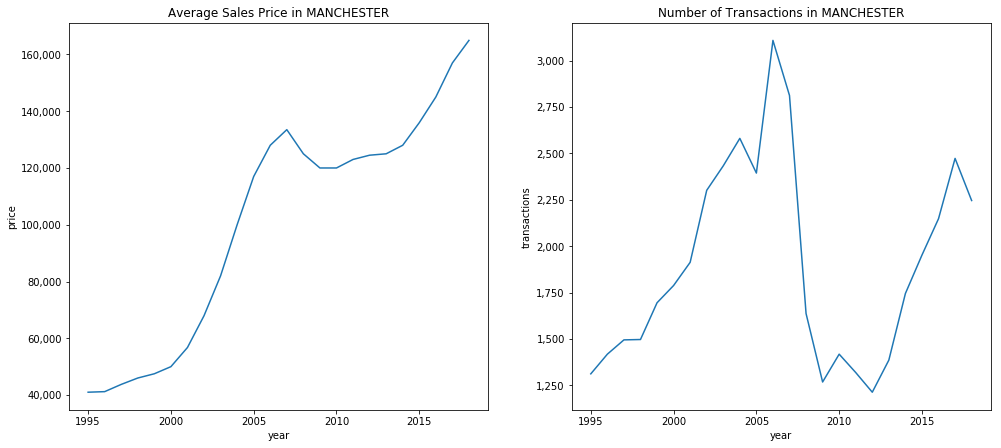

In [67]:
plot_metro_sales_vol("MANCHESTER")

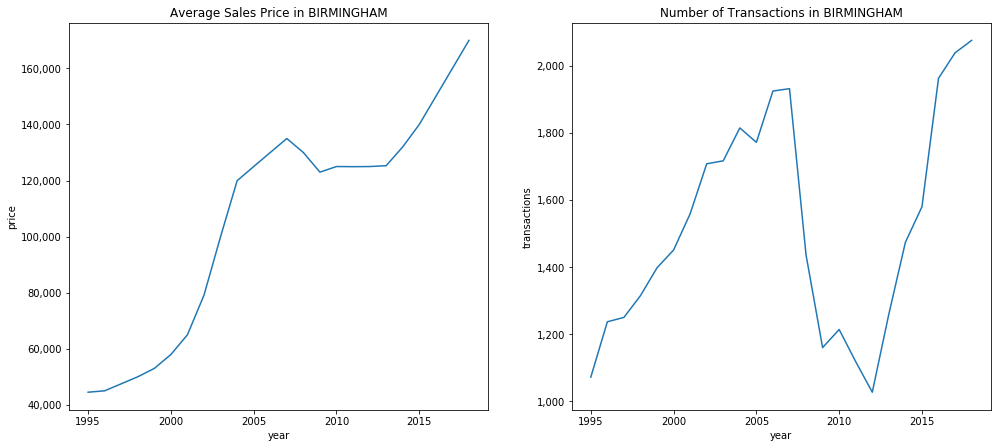

In [68]:
plot_metro_sales_vol("BIRMINGHAM")

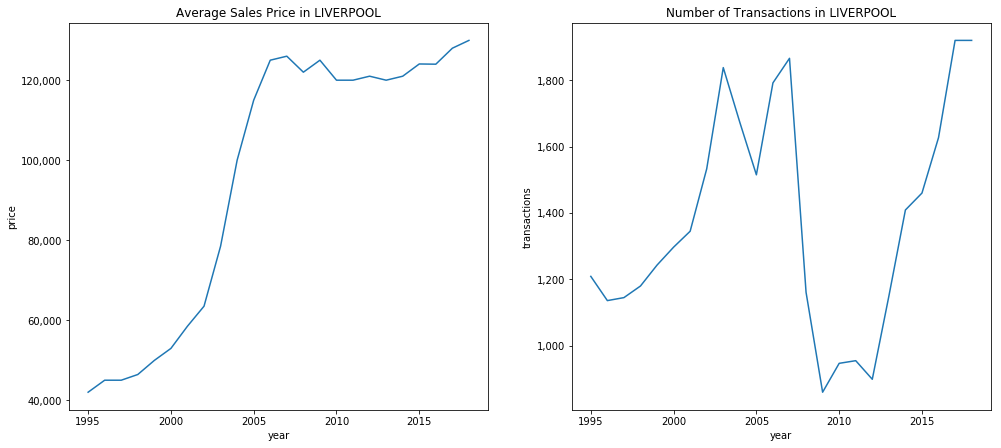

In [69]:
plot_metro_sales_vol("LIVERPOOL")

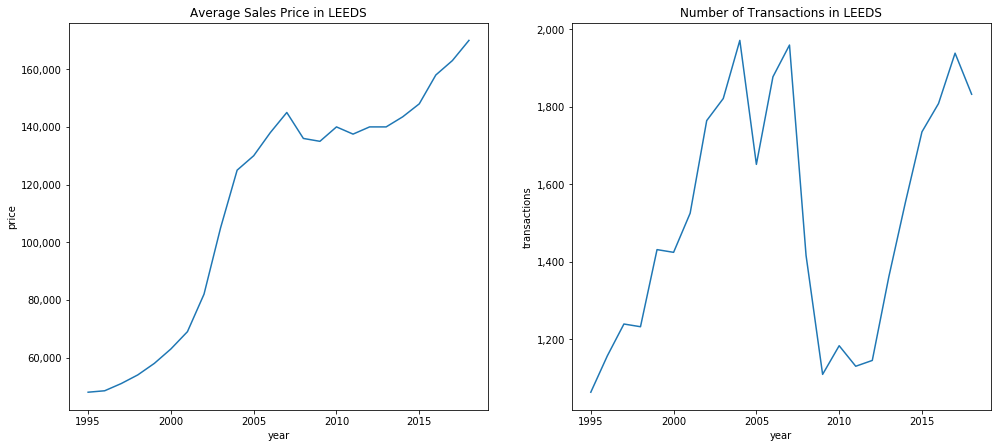

In [70]:
plot_metro_sales_vol("LEEDS")